# Power Spectral Estimation: Periodogram vs Model Based Approach

## A toy example: Prior information compensating reduced data sets

We will use the following matlab commands

* `randn(M,N)` generates a matrix of M-by-N matrix of samples drawn from a centered Gausian distribution with unitary variance; 
* `Y = filter(B,A,X)` implementing the filter $a(1)*y(n) = b(1)*x(n) + b(2)*x(n-1) + ... + b(nb+1)*x(n-nb)- a(2)*y(n-1) - ... - a(na+1)*y(n-na)$;
* `periodogram(X,[],NFFT,'twosided')` estimates the power specral density of the signal $X$ by mean of the periodogram (using `NFFT` samples for computing the Fourier transform) 
* `pyulear(X,arOrder,NFFT,,'twosided')` estimates the power specral density of the signal $X$ assuming that $X$ corresponds to an AR process of order `arOrder` and computing the model parameters by mean of the Yule-Walker equations (using `NFFT` samples to compute the spectrum).

In order to 

* Generate a white noise signal of length `dataSize` with standard deviation `sigma` <br> 
`whiteNoise=mean+sigma*randn(dataSize,1)`, where `mean=0`

* Generate an AR process with coefficients `arPolynomial=[1.0000   -0.6143    0.0240   -0.3823    0.4654    0.0190   -0.1962   -0.0315    0.0143]` (order 8), by filtering the white noise <br>
`simulatedSignal=filter(1,arPolynomial,whiteNoise)`

* Estimating the power spectral density

We start by considering lots of data. We shall then remark that in such a situation the periodogram well approximate the spectrum (small bias).

On the contrary, when the number of data samples is downsized, and consequently the available information reduced, we shall see that the *apriori* information brought by the model based approach plays a key role in the estimation quality and that the periodogram, bringing no additional information to the estimation problem, performs quite poorly.  



In [6]:
from pymatbridge import pymat
mlab = Matlab(executable='/home/cat/matlab/bin/matlab')
mlab.start()


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-6a34c335-dc2b-4b22-9ffa-994ed8415edd
Send 'exit' command to kill the server
.....MATLAB started and connected!


In [ ]:
import pymatbridge as pymat
ip = get_ipython()
pymat.load_ipython_extension(ip)

In [14]:
ip = get_ipython()
pymat.load_ipython_extension(ip, matlab='/home/cat/matlab/bin/matlab')


In [19]:
%%matlab
close all
clear all

% Set the parameter [a1 a2 ... aN] of the AR polynomial, where
% a1*X[n]+a2*X[n-1]+...+aN*X[n-(N-1)]=W[n]

arPolynomial=[1.0000   -0.6143    0.0240   -0.3823    0.4654    0.0190   -0.1962   -0.0315    0.0143];

% Set the number of samples for the simulation
dataSize=5000000;

% Generate a white noise
sigma=1;
mean=0;
whiteNoise=mean+sigma*randn(dataSize,1);

% Filter the white noise with an all poles filter with coefficients given by the AR polinomial
simulatedSignal=filter(1,arPolynomial,whiteNoise);

% Compute the spectrum of the rrSignal using the periodogram
psdPer=periodogram(simulatedSignal,[],dataSize,'twosided');

% Compute the spectrum of the rrSignal using an AR model
arOrder=length(arPolynomial);
psdAR=pyulear(simulatedSignal,arOrder,dataSize,'twosided');

% 
freqVector=((1:dataSize)/dataSize);





In [ ]:
% Plot spectra
figure;
subplot(2,1,1)
plot(freqVector,psdPer)
set(gca,'fontsize',14);
xlabel('normalized frequencies ');
title(['Periodogram ' '(' num2str(dataSize) ' samples) '],'FontSize',20);

subplot(2,1,2)
plot(freqVector,psdAR)
set(gca,'fontsize',14);
xlabel('normalized frequencies ');
title(['AR ' '(' num2str(dataSize) ' samples) '],'FontSize',20);

% Now let us downsize the data
dataSize=200;
simulatedSignal=simulatedSignal(1:dataSize);


% Compute the spectrum of the rrSignal using the periodogram
psdPer=periodogram(simulatedSignal,[],dataSize,'twosided');

% Compute the spectrum of the rrSignal using an AR model
arOrder=8;
psdAR=pyulear(simulatedSignal,arOrder,dataSize,'twosided');

% 
freqVector=((1:dataSize)/dataSize);

% Plot spectra
figure;
subplot(2,1,1)
plot(freqVector,psdPer)
set(gca,'fontsize',14);
xlabel('normalized frequencies ');
title(['Periodogram ' '(' num2str(dataSize) ' samples) '],'FontSize',20);

subplot(2,1,2)
plot(freqVector,psdAR)
set(gca,'fontsize',14);
xlabel('normalized frequencies ');
title(['AR ' '(' num2str(dataSize) ' samples) '],'FontSize',20);


## A case study: Heart Rate Variability, stress, fatigue and cardovascular disfuctions 

Heart Rate Variability (HRV) is defined as the physiological phenomenon of variation in the time interval between heartbeats, the so called RR intervals. Indeed, even on very short periods of time, the interval between heart beats, and consequently the heart rate, is not constant.
What we usually measure as heart rate is actually the average heart rate. 

The figure below depicts a segment of an Electrocardiogram signal (ECG), with two typical heart beats and the RR interval between them.

![](files/imgFiles/ecg.png)

The HRV contains important information about the cardiovascular as well as the general health of a person.

### A bit of Physiology: How the Nervous System Controls the Heart
The subcomponent of the central nervous system responsible of the involuntary functions is called Autonomic Nervous System (ANS). It is composed of two branches, the **Parasympathetic Nervous System** and the **Sympathetic Nervous System**, each working in opposing directions to maintain a balanced state of control over internal organs. Parasympathetic relax or slows down how organs function, *i.e.*, slows down heart beat, and the Sympathetic activate or speeds up the same organs, *i.e.*, speed up heart beat. 

A healthy body that is able to respond quickly to demands will have a very active parasynpathethic and sympathetic systems, trying hard to preserve the equilibrium. This corresponds to a high variance between heart beats.

On the contrary, a reduced heart rate variability reflects a stressed or tired body, *e.g.*, due to sickness or high volume training. 

### Spectral Analysis and HRV

By taking a look at the variance of the RR signal, *i.e.*, the power of the spectrum of the RR signal, one can obtain information on the general rest status of a person. A detailed spectral analysis, well beyound the simple energy computation, provides more insight on his health. Specifically, spectral analysis of heart beat intervals (RR) is typically used to estimate the effect of the sympathetic and parasympathetic modulation, and the balance between these two branches of the Autonomic Nervous System.

The sympatetic activity is believed to influence the 0.04 to 0.15 Hz component of the spectrum (LF band) while the parasympathetic activity have an effect on the 0.15 to 0.4 Hz component (HF band). Indeed the parasympathetic system reacts fast and its activity appears at high frequencies.

The ratio of the power contained in the LF and HF components has been used as a measure of the balance between the effects of the sympathetic and parasympathetic systems. Obviously, a proper spectral analysis is required in order to be able to compute the power of the LF and HF spectral components.

## Estimating the spectrum of a RR signal

We now proceed to the spectral analysis of the RR signal. The spectrum of a RR signal is a smooth one and can be approximated by a rational spectrum, that is, by the spectrum of an AR model.

We shall present the spectral estimation obtained usign the periodogram, simple but not exploiting the smooth information, and using an AR model.  

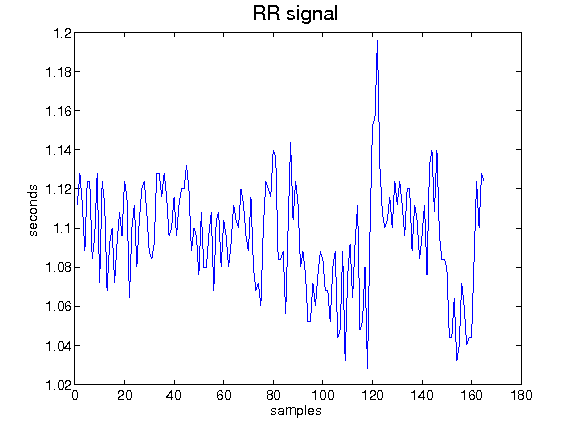

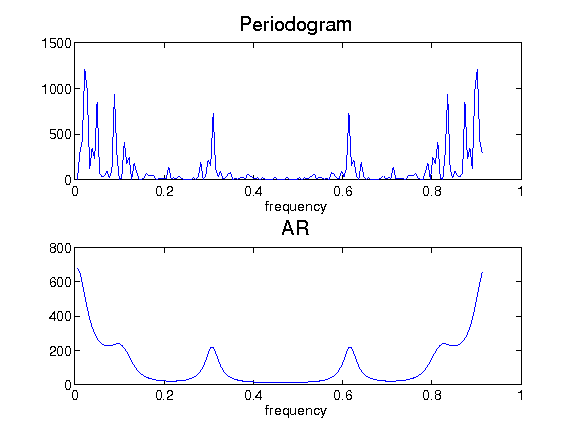

In [4]:
%%matlab
close all
clear all

% Load the RR signal
% Values are in milliseconds
load('rrSignal.mat')

dataSize=length(rrSignal);

figure; 
plot(rrSignal/1000)
set(gca,'fontsize',14);
xlabel('samples ');
ylabel('seconds ');
title('RR signal ','FontSize',20);

% Compute the average RR interval 
% Use it to eliminate the non informative DC component
averageRR=mean(rrSignal);
rrSignal=rrSignal-averageRR;

% Convert the average RR interval to seconds
averageRR=averageRR/1000;

% Compute the spectrum of the rrSignal using the periodogram
psdPer=periodogram(rrSignal,[],dataSize,'twosided');

% Compute the spectrum of the rrSignal using an AR model
arOrder=8;
psdAR=pyulear(rrSignal,arOrder,dataSize,'twosided');

% Set the frequency axis on the basis of the average RR
% Notice that the RR samples do not have regularly spaced timestamps
% It has been however shown that approximating the interval between two timestamps to the average interval 
% does not affect the medical information that can be inferred from the spectrum
freqVector=((1:dataSize)/dataSize)/averageRR;

% Plot spectra
figure;
subplot(2,1,1)
plot(freqVector,psdPer)
set(gca,'fontsize',14);
xlabel('frequency ');
title('Periodogram ','FontSize',20);

subplot(2,1,2)
plot(freqVector,psdAR)
set(gca,'fontsize',14);
xlabel('frequency ');
title('AR ','FontSize',20);
